In [2]:
import pandas as pd
import numpy as np

mturk = pd.read_csv("Study4_filtered.csv", low_memory=False).iloc[2:]
mturk = mturk.loc[mturk["stop_disp"]==mturk["stop_disp"]]
mturk = mturk[mturk["Duration (in seconds)"].apply(int)>900]

a = len(mturk)




k = lambda x: tuple(x.split(":")[0].replace(".png","").split("_"))
v = lambda x: float(x.split(":")[1] if x.split(":")[1]!="undefined" else -1)

import matplotlib.pyplot as plt
def get_ratings(mturk, conditions, includ_particip=False):
    ratings = []
    std = []
    j=0
    second_dim = mturk.dim.to_list()
    first_dim = ["attractive" if m=="trustworthy" else "trustworthy" for m in second_dim]
    for i,(r,first,second) in enumerate(zip(mturk["ratings_list"].to_list(),first_dim,second_dim)):
      order = []
      for x in r.split(","):
        x = x.split(":")[0].replace(".png","").replace("level",first if len(order)<50 else second)
        if x not in order and x:
          order+=[x]
      
      if len(order)>100: print(len(order))
      rating = [mturk.loc[:,c].iloc[i] for c in [m for m in mturk.columns if "_Q" in m]]
    
      r = [k(filename)+(str(k(filename)),float(impression)) for filename,impression in zip(order,rating)]
      if np.std([float(rr[-1]) for rr in r])<8 or len(order)<100:
        continue
      std+=[np.std([float(rr[-1]) for rr in r])]
      # print(len(set(rating)))
      if all([c(r, rating) for c in conditions]):
        ratings += [m[:-2]+(m[-2].replace("('",f"('{j}', '"),m[-1]) for m in r] if includ_particip else r
        j+=1
    return ratings

ratings = get_ratings(mturk, [lambda r, rating :len(set(rating))>40])
print("Unique answers: ",a - len(ratings)/100)
a = len(ratings)/100
mturk2_unfiltered = pd.DataFrame(ratings).iloc[:,-2:]
# display(mturk2_unfiltered)
sd_unfiltered = mturk2_unfiltered.groupby(4).std()
means_unfiltered = mturk2_unfiltered.groupby(4).mean()
means_unfiltered

Unique answers:  33.0


,5
4,
"('0', 'flow', 'attractive', '0')",26.172750
"('0', 'flow', 'attractive', '1')",23.389714
"('0', 'flow', 'attractive', '2')",28.901622
"('0', 'flow', 'attractive', '3')",30.533214
"('0', 'flow', 'attractive', '4')",43.332424
...,...
"('9', 'vector', 'trustworthy', '0')",51.513077
"('9', 'vector', 'trustworthy', '1')",48.533333
"('9', 'vector', 'trustworthy', '2')",47.416897


In [3]:

def deviation(row):
    return np.mean([(abs(means_unfiltered.loc[r[-2]]-r[-1])/sd_unfiltered.loc[r[-2]])**2 for r in row])
ratings_filtered = get_ratings(mturk, [lambda r, rating :len(set(rating))>40, lambda r, rating:deviation(r)<2.],False)
print("Deviation: ",a - len(ratings_filtered)/100)
a = len(ratings_filtered)/100

mturk2 = pd.DataFrame(ratings_filtered).iloc[:,-2:]
# sd = mturk2.groupby(4).std()
means = mturk2.groupby(4).mean().reset_index()


Deviation:  24.0


In [4]:
import pandas as pd
import ast

# Assuming the data is in a DataFrame called 'df'
# If it's not, you'll need to load it first
df_b = means_unfiltered.copy().reset_index()
df_b.columns = ['features', 'rating']
# df_b = df_b.loc[["trust" in m for m in df_b.features]]
# df_b["features"] = ["'".join(m.split("'")[:3])+"'"+"'".join(m.split("'")[5:]) for m in df_b["features"]]
# print(df_b.loc[["our" in m and "4" in m for m in df_b.features]].hist("rating"))
# df_b["features"] = [(m).replace('''"'0"''', "'0'").replace('''"4'"''', "'4'") for m in df_b.features]
df_b = df_b.loc[[not "'\"" in m and not "\"'" in m for m in df_b.features],:] 
# Step 1: Split the 'features' column into separate columns
df_b[['image', 'manip', 'dim', 'level']] = df_b['features'].apply(ast.literal_eval).tolist()

df_b.image=df_b.image.apply(int)
df_b.level = df_b.level.apply(int)
# df_b.loc[(df_b.level=='4'), "rating"] -= df_b.loc[(df_b.level=='0'), "rating"]
# df_b.loc[(df_b.level=='4'), "rating"]

# df_b.drop("features",axis=1)
# # Step 2: Pivot the DataFrame to create columns for each 'value'
# df_b_pivot = df_b.pivot(index=['image', 'manip'], columns='value', values='rating')

# # Step 3: Reset the index to make 'image' and 'attribute' regular columns
# df_b_pivot.reset_index(inplace=True)

# # Step 4: Rename the columns for clarity
# df_b_pivot.columns.name = None
# # df_b_pivot.rename(columns={"-1": 'negative', "0.00": 'neutral', "1": 'positive'}, inplace=True)


# # Step 5: Sort the DataFrame by 'image' and 'attribute' for better readability
# df_b_pivot.sort_values(['image', 'manip'], inplace=True)
# for i in df_b_pivot.image.unique():
#     df_b_pivot.loc[(df_b_pivot.image == i)&(df_b_pivot.manip=="peterson.jpg"),'0'] = df_b_pivot.loc[(df_b_pivot.image == i)&(df_b_pivot.manip=="our.jpg"),'0'].item()
# # Display the result
# for r in df_b_pivot.manip.unique():
#     print(r)
#     (df_b_pivot[df_b_pivot.manip == r].drop(["image","manip"], axis=1).mean()).plot()
#     display(df_b_pivot[df_b_pivot.manip == r].drop(["image","manip"], axis=1).mean())


In [5]:
df_b

,features,rating,image,manip,dim,level
0,"('0', 'flow', 'attractive', '0')",26.172750,0,flow,attractive,0
1,"('0', 'flow', 'attractive', '1')",23.389714,0,flow,attractive,1
2,"('0', 'flow', 'attractive', '2')",28.901622,0,flow,attractive,2
3,"('0', 'flow', 'attractive', '3')",30.533214,0,flow,attractive,3
4,"('0', 'flow', 'attractive', '4')",43.332424,0,flow,attractive,4
...,...,...,...,...,...,...
995,"('9', 'vector', 'trustworthy', '0')",51.513077,9,vector,trustworthy,0
996,"('9', 'vector', 'trustworthy', '1')",48.533333,9,vector,trustworthy,1
997,"('9', 'vector', 'trustworthy', '2')",47.416897,9,vector,trustworthy,2
998,"('9', 'vector', 'trustworthy', '3')",46.527000,9,vector,trustworthy,3


In [6]:
import pandas as pd
import numpy as np

# Assuming df_b is already loaded

# Filter data for only levels 0 and 4
level_0 = df_b[df_b['level'] == 0]
level_4 = df_b[df_b['level'] == 4]

# Create unique combinations of image and manip
combinations = df_b[['image', 'manip']].drop_duplicates()

# Initialize a results dataframe
results = []

# Calculate effect for each combination
for _, combo in combinations.iterrows():
    img = combo['image']
    manip_type = combo['manip']
    
    # Get rating for level 0
    rating_0 = level_0[(level_0['image'] == img) & (level_0['manip'] == manip_type)]['rating'].values
    
    # Get rating for level 4
    rating_4 = level_4[(level_4['image'] == img) & (level_4['manip'] == manip_type)]['rating'].values
    
    # Calculate effect (difference)
    if len(rating_0) > 0 and len(rating_4) > 0:
        effect = rating_4[0] - rating_0[0]
        
        # Get dimension from the data
        dim = df_b[(df_b['image'] == img) & (df_b['manip'] == manip_type)]['dim'].iloc[0]
        
        # Add to results
        results.append({
            'image': img,
            'manip': manip_type,
            'dim': dim,
            'rating_level_0': rating_0[0],
            'rating_level_4': rating_4[0],
            'effect': effect
        })

# Convert results to dataframe
effect_df = pd.DataFrame(results)

# Sort by image and manip for better readability
effect_df = effect_df.sort_values(['image', 'manip'])

# Display the results
print("Effect (Level 4 - Level 0) for each combination of image and manip:")
display(effect_df.sort_values(by="manip"))

# Calculate average effect by manipulation type
avg_effect_by_manip = effect_df.groupby('manip')['effect'].mean().reset_index()
print("\nAverage effect by manipulation type:")
display(avg_effect_by_manip)

# Calculate average effect by dimension
avg_effect_by_dim = effect_df.groupby('dim')['effect'].mean().reset_index()
print("\nAverage effect by dimension:")
display(avg_effect_by_dim)

Effect (Level 4 - Level 0) for each combination of image and manip:


,image,manip,dim,rating_level_0,rating_level_4,effect
0,0,flow,attractive,26.172750,43.332424,17.159674
72,41,flow,attractive,32.633333,49.551429,16.918095
52,32,flow,attractive,23.518621,50.481351,26.962731
18,17,flow,attractive,69.137857,67.952821,-1.185037
70,40,flow,attractive,40.482250,57.884848,17.402598
...,...,...,...,...,...,...
43,28,vector,attractive,50.328718,54.604571,4.275853
45,29,vector,attractive,47.569231,49.460250,1.891019
49,30,vector,attractive,50.061190,49.602000,-0.459190
15,15,vector,attractive,37.415000,48.834848,11.419848



Average effect by manipulation type:


,manip,effect
0,flow,9.079057
1,vector,3.363539



Average effect by dimension:


,dim,effect
0,attractive,6.221298


In [7]:
df_all = df_b.copy()
df_flow = df_all.loc[(df_all.manip=="flow")&(df_all.level!=0)].drop("manip",axis=1)
df_vector  = df_all.loc[(df_all.manip=="vector")].drop("manip",axis=1)


df_flow = pd.concat([df_flow,df_vector.loc[(df_vector.level==0)]])
M_flow = (df_flow.drop(["features","image"], axis=1).groupby(["dim","level"]).mean())
SEM_flow = df_flow.drop(["features","image"], axis=1).groupby(["dim","level"]).std()/(df_flow.drop(["features","image"], axis=1).groupby(["dim","level"]).count())**0.5
M_vector = (df_vector.drop(["features","image"], axis=1).groupby(["dim","level"]).mean())
SEM_vector = df_vector.drop(["features","image"], axis=1).groupby(["dim","level"]).std()/(df_vector.drop(["features","image"], axis=1).groupby(["dim","level"]).count())**0.5


M_vector,SEM_vector

(                      rating
 dim         level           
 attractive  0      45.267513
             1      47.190499
             2      49.060955
             3      49.356906
             4      48.631052
 trustworthy 0      48.696402
             1      50.437627
             2      50.082757
             3      50.991749
             4      48.745864,
                      rating
 dim         level          
 attractive  0      1.690292
             1      1.664954
             2      1.665814
             3      1.820064
             4      1.828427
 trustworthy 0      1.241281
             1      1.098107
             2      1.042428
             3      1.090889
             4      1.061868)


VECTOR - Attractive Dimension:
Intercept: 46.1227
Slope: 0.8893
R²: 0.0106
F-statistic: 2.6455
p-value: 0.105114

VECTOR - Trustworthy Dimension:
Intercept: 49.6603
Slope: 0.0653
R²: 0.0001
F-statistic: 0.0346
p-value: 0.852566

FLOW - Attractive Dimension:
Intercept: 45.6401
Slope: 4.1956
R²: 0.2057
F-statistic: 64.2373
p-value: 0.000000

FLOW - Trustworthy Dimension:
Intercept: 49.9007
Slope: 2.0934
R²: 0.1332
F-statistic: 38.1081
p-value: 0.000000


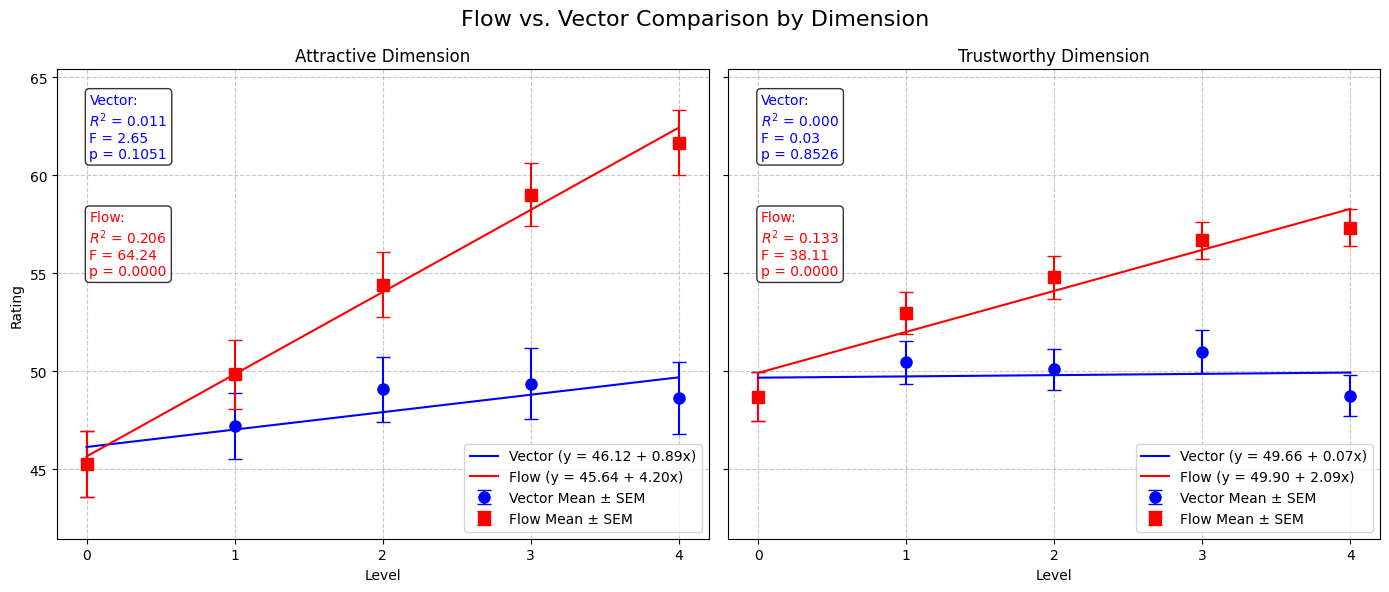


=== VECTOR CONDITION - ATTRACTIVE ===

ANOVA for attractive dimension:
                sum_sq     df         F    PR(>F)
level       395.470346    1.0  2.645491  0.105114
Residual  37073.132955  248.0       NaN       NaN

=== FLOW CONDITION - ATTRACTIVE ===

ANOVA for attractive dimension:
                sum_sq     df          F        PR(>F)
level      8801.522761    1.0  64.237273  4.335685e-14
Residual  33979.924028  248.0        NaN           NaN

=== VECTOR CONDITION - TRUSTWORTHY ===

ANOVA for trustworthy dimension:
                sum_sq     df         F    PR(>F)
level         2.132354    1.0  0.034611  0.852566
Residual  15279.286817  248.0       NaN       NaN

=== FLOW CONDITION - TRUSTWORTHY ===

ANOVA for trustworthy dimension:
                sum_sq     df          F        PR(>F)
level      2191.162980    1.0  38.108067  2.714275e-09
Residual  14259.668996  248.0        NaN           NaN


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy import stats

# Assuming df_vector and df_flow are already defined from your code
# Perform linear regression analysis for each dimension in each dataset

def analyze_regression(df, manip_name, dims=['attractive', 'trustworthy']):
    """
    Perform linear regression analysis on the dataset for each dimension.
    Returns regression results and statistics.
    """
    results = {}
    
    for dim in dims:
        # Filter data for the current dimension
        subset = df[df.dim == dim]
        
        # Prepare X (with constant term) and y
        X = sm.add_constant(subset['level'])
        y = subset['rating']
        
        # Fit linear regression model
        model = sm.OLS(y, X).fit()
        
        # Store results
        results[dim] = {
            'model': model,
            'intercept': model.params[0],
            'slope': model.params[1],
            'r_squared': model.rsquared,
            'f_statistic': model.fvalue,
            'p_value': model.f_pvalue,
            'summary': model.summary()
        }
        
        # Print statistics
        print(f"\n{manip_name.upper()} - {dim.capitalize()} Dimension:")
        print(f"Intercept: {model.params[0]:.4f}")
        print(f"Slope: {model.params[1]:.4f}")
        print(f"R²: {model.rsquared:.4f}")
        print(f"F-statistic: {model.fvalue:.4f}")
        print(f"p-value: {model.f_pvalue:.6f}")
    
    return results

def calculate_stats(df, dims=['attractive', 'trustworthy']):
    """
    Calculate mean and standard error of the mean for each dimension and level.
    """
    stats_dict = {}
    
    for dim in dims:
        dim_data = df[df.dim == dim]
        
        # Group by level and calculate statistics
        grouped = dim_data.groupby('level')['rating'].agg(['mean', 'std', 'count'])
        grouped['sem'] = grouped['std'] / np.sqrt(grouped['count'])
        
        stats_dict[dim] = grouped
    
    return stats_dict

def plot_comparison(vector_regression, flow_regression, vector_stats, flow_stats, dims=['attractive', 'trustworthy'], figsize=(14, 6)):
    """
    Plot Flow and Vector conditions side by side for each dimension.
    Both plots use the same Y-axis scale.
    """
    fig, axes = plt.subplots(1, len(dims), figsize=figsize, sharey=True)
    
    # Color scheme for consistency
    vector_color = 'blue'
    flow_color = 'red'
    
    y_min, y_max = float('inf'), float('-inf')
    
    # First pass to determine common y-axis limits
    for dim in dims:
        # Get vector stats and predicted values
        vector_data = vector_stats[dim]
        vector_model = vector_regression[dim]['model']
        vector_y_pred = vector_model.params[0] + vector_model.params[1] * np.array([0, 1, 2, 3, 4])
        
        # Get flow stats and predicted values
        flow_data = flow_stats[dim]
        flow_model = flow_regression[dim]['model']
        flow_y_pred = flow_model.params[0] + flow_model.params[1] * np.array([0, 1, 2, 3, 4])
        
        # Update min and max for y-axis
        y_min = min(y_min, 
                    vector_data['mean'].min() - vector_data['sem'].max(),
                    flow_data['mean'].min() - flow_data['sem'].max(),
                    vector_y_pred.min(),
                    flow_y_pred.min())
        
        y_max = max(y_max, 
                    vector_data['mean'].max() + vector_data['sem'].max(),
                    flow_data['mean'].max() + flow_data['sem'].max(),
                    vector_y_pred.max(),
                    flow_y_pred.max())
    
    # Add some padding to y-axis limits
    y_padding = (y_max - y_min) * 0.1
    y_min -= y_padding
    y_max += y_padding
    
    # Second pass to create the plots
    for i, dim in enumerate(dims):
        ax = axes[i] if len(dims) > 1 else axes
        
        # Get vector stats and regression data
        vector_data = vector_stats[dim]
        vector_model = vector_regression[dim]['model']
        
        # Get flow stats and regression data
        flow_data = flow_stats[dim]
        flow_model = flow_regression[dim]['model']
        
        # Plot vector means and standard error
        ax.errorbar(
            vector_data.index, 
            vector_data['mean'], 
            yerr=vector_data['sem'], 
            fmt='o', 
            color=vector_color,
            label='Vector Mean ± SEM',
            capsize=5,
            markersize=8
        )
        
        # Plot flow means and standard error
        ax.errorbar(
            flow_data.index, 
            flow_data['mean'], 
            yerr=flow_data['sem'], 
            fmt='s',  # Different marker for flow
            color=flow_color,
            label='Flow Mean ± SEM',
            capsize=5,
            markersize=8
        )
        
        # Plot vector regression line
        x_range = np.linspace(0, 4, 100)
        vector_y_pred = vector_model.params[0] + vector_model.params[1] * x_range
        ax.plot(x_range, vector_y_pred, '-', color=vector_color, 
                label=f'Vector (y = {vector_model.params[0]:.2f} + {vector_model.params[1]:.2f}x)')
        
        # Plot flow regression line
        flow_y_pred = flow_model.params[0] + flow_model.params[1] * x_range
        ax.plot(x_range, flow_y_pred, '-', color=flow_color, 
                label=f'Flow (y = {flow_model.params[0]:.2f} + {flow_model.params[1]:.2f}x)')
        
        # Add vector regression statistics
        vector_r2 = vector_regression[dim]['r_squared']
        vector_f = vector_regression[dim]['f_statistic']
        vector_p = vector_regression[dim]['p_value']
        
        vector_stats_text = f"Vector:\n$R^2$ = {vector_r2:.3f}\nF = {vector_f:.2f}\np = {vector_p:.4f}"
        ax.text(0.05, 0.95, vector_stats_text, transform=ax.transAxes, 
                verticalalignment='top', color=vector_color,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Add flow regression statistics
        flow_r2 = flow_regression[dim]['r_squared']
        flow_f = flow_regression[dim]['f_statistic']
        flow_p = flow_regression[dim]['p_value']
        
        flow_stats_text = f"Flow:\n$R^2$ = {flow_r2:.3f}\nF = {flow_f:.2f}\np = {flow_p:.4f}"
        ax.text(0.05, 0.70, flow_stats_text, transform=ax.transAxes, 
                verticalalignment='top', color=flow_color,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Set labels and title
        ax.set_xlabel('Level')
        if i == 0:  # Only add y-label to the first subplot
            ax.set_ylabel('Rating')
        ax.set_title(f'{dim.capitalize()} Dimension')
        ax.set_xticks(range(5))
        ax.set_ylim(y_min, y_max)  # Use the common y-axis limits
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(loc='lower right')
    
    plt.suptitle('Flow vs. Vector Comparison by Dimension', fontsize=16)
    plt.tight_layout()
    return fig

# Analyze vector data
vector_regression = analyze_regression(df_vector, 'vector')
vector_stats = calculate_stats(df_vector)

# Analyze flow data
flow_regression = analyze_regression(df_flow, 'flow')
flow_stats = calculate_stats(df_flow)

# Create comparison plot
comparison_fig = plot_comparison(vector_regression, flow_regression, vector_stats, flow_stats)
plt.savefig('dimension_comparison.png', dpi=300, bbox_inches='tight')

# Show plots
plt.show()

# Additional method using statsmodels formula API for comparison
def run_anova_regression(df, dimension):
    """
    Run a more detailed regression analysis with ANOVA-style output
    """
    # Filter data for the specific dimension
    df_dim = df[df.dim == dimension]
    
    # Create the model using R-style formula
    model = ols('rating ~ level', data=df_dim).fit()
    
    # Run ANOVA
    anova_table = sm.stats.anova_lm(model, typ=2)
    
    print(f"\nANOVA for {dimension} dimension:")
    print(anova_table)
    
    return model, anova_table
df_vector
# Run additional ANOVA analysis for each dimension in each condition
for dim in ['attractive', 'trustworthy']:
    print(f"\n=== VECTOR CONDITION - {dim.upper()} ===")
    vector_model, vector_anova = run_anova_regression(df_vector, dim)
    
    print(f"\n=== FLOW CONDITION - {dim.upper()} ===")
    flow_model, flow_anova = run_anova_regression(df_flow, dim)

In [9]:
df_vector.to_csv('df_vector.csv')
df_flow.to_csv('df_flow.csv')

In [10]:
df_c = df_b
df_c = df_c.drop(["features","image"], axis=1).groupby(["manip","dim","level"]).mean()
df_c.loc[(df_c.level==0)&(df_c.manip=="flow"), "rating"] = df_c.loc[(df_c.level==0)&(df_c.manip!="flow"), "rating"]


AttributeError: 'DataFrame' object has no attribute 'level'

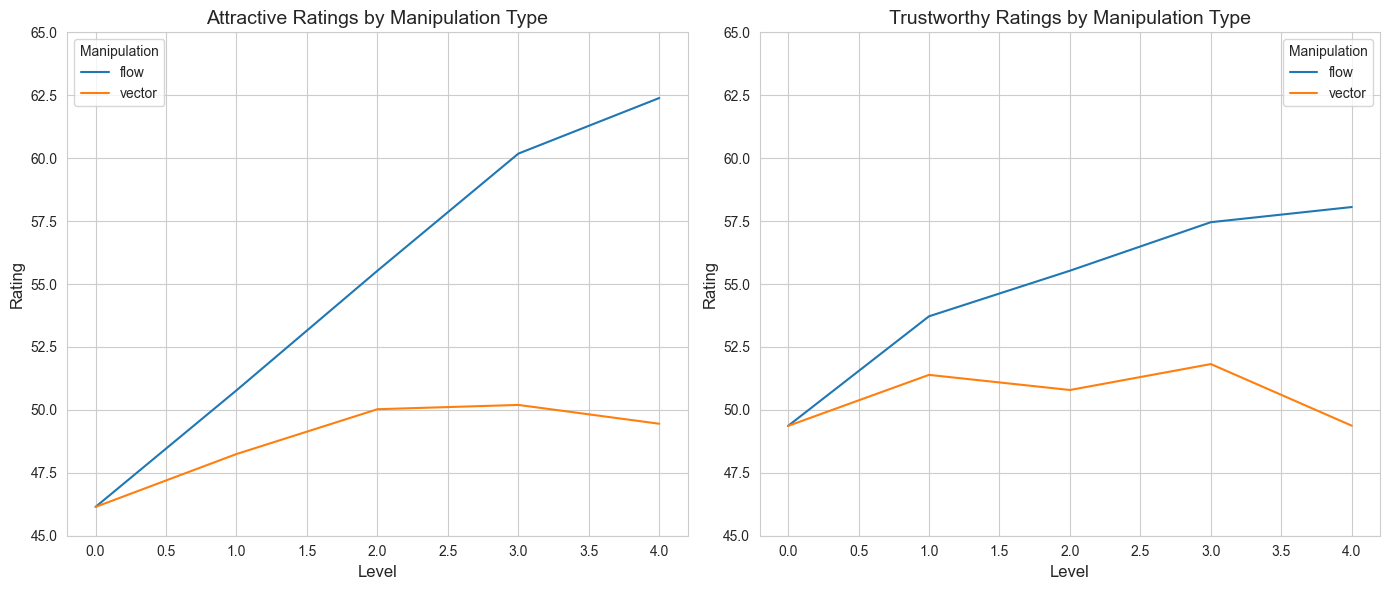

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create dataframe from the data in the image
data = {
    'manip': ['flow', 'flow', 'flow', 'flow', 'flow', 'flow', 'flow', 'flow', 'flow', 'flow',
              'vector', 'vector', 'vector', 'vector', 'vector', 'vector', 'vector', 'vector', 'vector', 'vector'],
    'dim': ['attractive', 'attractive', 'attractive', 'attractive', 'attractive',
            'trustworthy', 'trustworthy', 'trustworthy', 'trustworthy', 'trustworthy',
            'attractive', 'attractive', 'attractive', 'attractive', 'attractive',
            'trustworthy', 'trustworthy', 'trustworthy', 'trustworthy', 'trustworthy'],
    'level': [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
    'rating': [46.144229850226, 50.776346, 55.528575, 60.181884, 62.391135,
               49.362298, 53.717117, 55.529278, 57.456843, 58.059264,
               46.144229, 48.245275, 50.026120, 50.196428, 49.448763,
               49.362298, 51.390445, 50.789800, 51.819582, 49.371043]
}

df = pd.DataFrame(data)

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

# Create subplot for "attractive"
plt.subplot(1, 2, 1)
sns.lineplot(x='level', y='rating', hue='manip', data=df[df['dim'] == 'attractive'], 
             markers=True, dashes=False, markersize=8)
plt.title('Attractive Ratings by Manipulation Type', fontsize=14)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Manipulation')
plt.ylim(45, 65)  # Set y-axis limits for better comparison

# Create subplot for "trustworthy"
plt.subplot(1, 2, 2)
sns.lineplot(x='level', y='rating', hue='manip', data=df[df['dim'] == 'trustworthy'], 
             markers=True, dashes=False, markersize=8)
plt.title('Trustworthy Ratings by Manipulation Type', fontsize=14)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.legend(title='Manipulation')
plt.ylim(45, 65)  # Keep same y-axis limits for fair comparison

plt.tight_layout()
plt.savefig('manipulation_comparison.png', dpi=300)
plt.show()


In [29]:
df_b

,features,rating,image,value,manip
0,"('0', 'attractive', '0')",27.535263,0,attractive,0
1,"('0', 'attractive', '1')",23.871471,0,attractive,1
2,"('0', 'attractive', '2')",27.227647,0,attractive,2
3,"('0', 'attractive', '3')",31.520000,0,attractive,3
4,"('0', 'attractive', '4')",43.027333,0,attractive,4
...,...,...,...,...,...
990,"('9', 'attractive', '0')",44.150000,9,attractive,0
991,"('9', 'attractive', '1')",42.428571,9,attractive,1
992,"('9', 'attractive', '2')",46.224444,9,attractive,2
993,"('9', 'attractive', '3')",40.699630,9,attractive,3


In [27]:
import pandas as pd
import ast

# Assuming the data is in a DataFrame called 'df'
# If it's not, you'll need to load it first
df_b = means.copy()
dim = "attractive"
df_b.columns = ['features', 'rating']
df_b = df_b.loc[[dim in m for m in df_b.features]]
df_b["features"] = ["'".join(m.split("'")[:3])+"'"+"'".join(m.split("'")[5:]) for m in df_b["features"]]
# print(df_b.loc[["our" in m and "4" in m for m in df_b.features]].hist("rating"))

# Step 1: Split the 'features' column into separate columns
df_b[['image', 'value', 'manip']] = df_b['features'].apply(ast.literal_eval).tolist()

# Step 2: Pivot the DataFrame to create columns for each 'value'
df_b_pivot = df_b.pivot(index=['image', 'manip'], columns='value', values='rating')

# Step 3: Reset the index to make 'image' and 'attribute' regular columns
df_b_pivot.reset_index(inplace=True)

# Step 4: Rename the columns for clarity
df_b_pivot.columns.name = None
# df_b_pivot.rename(columns={"-1": 'negative', "0.00": 'neutral', "1": 'positive'}, inplace=True)

# Step 5: Sort the DataFrame by 'image' and 'attribute' for better readability
df_b_pivot.sort_values(['image', 'manip'], inplace=True)
for i in df_b_pivot.image.unique():
    df_b_pivot.loc[(df_b_pivot.image == i)&(df_b_pivot.manip=="peterson.jpg"),'0'] = df_b_pivot.loc[(df_b_pivot.image == i)&(df_b_pivot.manip=="our.jpg"),'0'].item()
# Display the result
def convolution_on_list_of_numbers(l, filter):
    return [filter(l[i:i+5]) for i in range(len(l))]

filter = lambda l: sum(l[:3])/len(l[:3])
csv_entries = []
for ii, i in enumerate(df_b_pivot.image.unique()):
    for r in df_b_pivot.manip.unique():
        y = [df_b_pivot.loc[(df_b_pivot.image == i)&(df_b_pivot.manip==r),str(j)].item() for j in range(5)]
        y = [y[0],convolution_on_list_of_numbers(y,filter)[1],convolution_on_list_of_numbers(y,filter)[4]]
        a,b,c = y
        plt.plot([0,2,4],y)
        wzrost = a<b<c
        spadek = c<b<a
        parabola = b>c and b>a
        flatline = a<b and c-b<0.1*(b-a)
        flatline_coeff = (c-b)/(b-a)
        chaos = not wzrost and not parabola and not spadek 
        max_effect_comparison = c - a
        medium_effect_comparison = b-a
        max_effect_delta = c
        medium_effect_delta = b
        csv_entries+=[(ii, int(i), dim,r[:-4], wzrost, spadek, parabola, flatline, flatline_coeff, chaos, max_effect_comparison, max_effect_delta, medium_effect_comparison, medium_effect_delta)]
        # (df_b_pivot[df_b_pivot.manip == r].drop(["image","manip"], axis=1).mean()).plot()
        # display(df_b_pivot[df_b_pivot.manip == r].drop(["image","manip"], axis=1).mean())
    plt.ylim(35,75)
    # plt.show()
# df_b_pivot

df = pd.DataFrame(csv_entries, columns=["id", "name", "dim", "manip_type", "wzrost", "spadek", "parabola", "flatline", "flatline_coeff", "chaos", "max_effect_division", "max_effect_delta", "medium_effect_division", "medium_effect_delta"])
v = df.loc[df.manip_type== "peterson", ["max_effect_division", "medium_effect_division"]].values[:]
df.loc[df.manip_type== "peterson", ["max_effect_division", "medium_effect_division"]] /= df.loc[df.manip_type== "our", ["max_effect_division", "medium_effect_division"]].values
df.loc[df.manip_type== "our", ["max_effect_division", "medium_effect_division"]] /= v
v = df.loc[df.manip_type== "peterson", ["max_effect_delta", "medium_effect_delta"]].values[:]
df.loc[df.manip_type== "peterson", ["max_effect_delta", "medium_effect_delta"]] -= df.loc[df.manip_type== "our", ["max_effect_delta", "medium_effect_delta"]].values
df.loc[df.manip_type== "our", ["max_effect_delta", "medium_effect_delta"]] -= v
df.rename(columns={"max_effect_division": "max_effect_n_times_better", "medium_effect_division": "medium_effect_n_times_better", "max_effect_delta": "max_effect_better_by", "medium_effect_delta": "medium_effect_better_by"}, inplace=True)
print(df)
df.to_csv(dim+".csv")
# df.drop("dim", axis=1).groupby("manip_type").mean()



ValueError: Index contains duplicate entries, cannot reshape